<a href="https://colab.research.google.com/github/sfrias/HashCode2019/blob/master/Training/Pizza_SFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Pizza test problem for Hashcode Training 2019

#Pizza portions with two ingredients M or T, one each cell, rectangular, at least L cells for each ingredient, at most H cells in portion for total.

# Target: maximize cell number each portion, for all portions

# Input R(rows 1-1000),C(columns 1-1000),L,H, and next lines R row sequencesde with M or T cells,  and C cells.

# First approach: 

# - first parametric analysis: M cells vs. T cells number. Distribution and distances for scarcest ingredient.
# - difference between maximum rectangular areas achievable for H (maximum number of cells per portion).
# - travel and selection of achievable portions, be they linear, rectangular or square.  

# Data Structures:

# - use a 'reserved' marker (change uppercase to lowercase at matrix)
# - use a table with a reserved portions, (x1,y1)-(x2,y2), number of cells, number of cells to achiveve H(maximum number of cells)


In [0]:
#! /usr/bin/env python
# -*- coding: utf-8 -*-

In [0]:
# Import and package configuration
import matplotlib.pyplot as pyplot
from pylab import *

In [0]:
    # Init Variables and environment
    P=[]


In [0]:
# Service Functions

### Download files from hashcode

In [0]:
# Download data files from hashcode

In [0]:
#!wget -O a_example.in "https://hashcodejudge.withgoogle.com/download/blob/AMIfv94a0AEZeXBwiX5K_V_v7KjL7O6Aap4BnRY1uwQw8HGUyLebQdUeRXCyDrgWT4uGmgi58WsczmDeOWdLRYazFhwL8132UbTiY_mXZJCpQs7CLuoPFu3bK0GERyHyoGa94jH3e7jWZ1WAze-zgT792sa7KldrbT5qSIjEeXpqY8J7GljvAaphyCGl9We5i3OLgUSgujo6HAfkilI-LryjdjBwSUjUHIVZTmpun6K2K92J_tKqdfJJT8YU-2pUmW1ItCeF-9X7BZQdcK44OIhBrhAk6SdJQEMN6JeWUKyOA4Xk3WAmt4guASSCpb09YzaOe9TWVb5Y"

In [0]:
#!wget -O b_small.in "https://hashcodejudge.withgoogle.com/download/blob/AMIfv96COub6dUXP4pW4wPepPgH12OB4b4zHWFdVyXcveoTRC5G7mX0J1GiokKTRkuO2J44Dym21YIiGQtrmG9Sct1zeyN5nPQ3CSvjOBQ1tNg2ZisMMTiikgnV6LSr5zUs0fwSfMOKNuoXHDxwugKuh0kHZMpG2u3BP8iJo9gwFjcBU4mlvFRzI8-Cr-Kdwrr8TtwtKFuMyz4wVLHGfXN7T6-BdEv1cXnARG5RDeDdoUaW7ay1-y2tuAgyqRqexUAHFTy-R5UW542UaUcFjM62lhYM4hrxAKlWS2sYOHM02N7KRuCli_hTrvh3F3tBqYbhnvRH8xGam"

In [7]:
#!wget -O c_medium.in "https://hashcodejudge.withgoogle.com/download/blob/AMIfv94YzNJY6Qjdl6KVcoxQIDtoW6FAdTFdWgPkjw8ed__736X6exgy-GRDRl6h0zRZPCt3Q8lf6U75QBZtR4iV5nUcws0cJsLxGNg8InMOqMKApoAI_pBWbEcrBx_zZXjDJTYf21WhshrBH4j0Eat7fbNWDFaL49N_36PZRFe-hvohCiZ_U1vZO03RXasOBGIyXd48uSY9YRoivJMBvmEBlq2NZjaIpnlefy8_qmwNfkZyGpdhFoxKbdugEGHNkYCjPzpKZ7pPOb-8-0o_kILQf1AbPp4VvG5TQuez1ZbywHoGAKlAUCwJsJNE-75ixd-eoGBL3fHx"

--2019-02-19 01:06:25--  https://hashcodejudge.withgoogle.com/download/blob/AMIfv94YzNJY6Qjdl6KVcoxQIDtoW6FAdTFdWgPkjw8ed__736X6exgy-GRDRl6h0zRZPCt3Q8lf6U75QBZtR4iV5nUcws0cJsLxGNg8InMOqMKApoAI_pBWbEcrBx_zZXjDJTYf21WhshrBH4j0Eat7fbNWDFaL49N_36PZRFe-hvohCiZ_U1vZO03RXasOBGIyXd48uSY9YRoivJMBvmEBlq2NZjaIpnlefy8_qmwNfkZyGpdhFoxKbdugEGHNkYCjPzpKZ7pPOb-8-0o_kILQf1AbPp4VvG5TQuez1ZbywHoGAKlAUCwJsJNE-75ixd-eoGBL3fHx
Resolving hashcodejudge.withgoogle.com (hashcodejudge.withgoogle.com)... 74.125.142.141, 2607:f8b0:400e:c08::8d
Connecting to hashcodejudge.withgoogle.com (hashcodejudge.withgoogle.com)|74.125.142.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘c_medium.in’

c_medium.in             [ <=>                ]  49.04K   289KB/s    in 0.2s    

2019-02-19 01:06:31 (289 KB/s) - ‘c_medium.in’ saved [50213]



In [0]:
#!wget -O d_big.in "https://hashcodejudge.withgoogle.com/download/blob/AMIfv961JSa2pvz3d8q8Km2zodAht_0-fdvpSjGdsVF8pOLHKSfwtoB9hQ2Yux_nOPAjOdQSISVyVtc9DmmiRlaou6HPNbeFKALIZfTJUx9zg_SmEuyENWK6SNl2lWD8PcbopW7ezmsiuwONB5y44RR7dIUJItVc2uHfi-PyUvHjrnG2HeFV3Ubv5U6F38oMfvxSpg-ahnTqWv0e_AatNvI8I5CBDhDVvTyQq-Cu4rhPMH0EPU2P8cL1TByAZKxCAkkVGvJUOm8DyM_D7Ru4DsLKUnNR5GZlsTJBjiPCe-K37eXTk5O3DCkPmq8VDqfaBxOVeheAU5ZA"

In [8]:
!ls

c_medium.in  sample_data


### Load/Save data from file

In [0]:
# Load data from .in

In [0]:
def loaddata(nom):
  file = open(nom,'r')
  line = file.readline()
  # Setting input variable
  row_count, col_count, min_ingr, max_cell = tuple(map(int,line.split(' ')))
  #Creating the pizza grid and populating it
  grid = []
  for i in range(row_count):
    grid.append(file.readline().rstrip())
  file.close()
  return row_count,col_count, min_ingr, max_cell,grid  

In [0]:
# Save data to .out

### Program execution

In [0]:
row_count, col_count, min_ingr, max_cell, grid = loaddata('c_medium.in')

In [11]:
row_count,col_count,min_ingr,max_cell

(200, 250, 4, 12)

In [12]:
#grid

['TMMMTTTMMMMTMMTTMTTMTTMMTMMMTTTTTTMTTTTTTMMMMMMMTMMMMTTTMTMMTTTTTTMMMMMTTMTMTMMMTMTTMMTTMMMTTMMMTTTTMTTTMTMMMTTMTMTTMTTMTTTTMMMTTTMMTTMMMTTMMTMTMMTTMMTTMTMMMTMMMTMTTMMTMMTTMTTMMMMMTTTMMMTMMMMMMTMTTMTTTTTMMMMMMTMTMMTTTTMMTTTTMTTTMTMMTTMMTMTTMTTTMTMMTM',
 'MTMMTTMMMTTTMMTTTTTMTMTTMMMTMTTMTMMTTMMMMTTMTTMMMTTTTTMMMTTTTMMMTTMTMTTTTTMTMTTTTMTMTTMTMMTMMMMTTMTMTTTMTMTMMMTMTTMTMTMTTTTTMMTMMTTMMMMMMMTTTTMTMMMTTMMMMTTMMTTMTTTMMMMMTMMTMTMMTMTTMMMTTMMTMTTTTTTTTTTTTTMMMTTTTMMMMMTMMTTMMTMMMTTTTTMMMTTTMTTTMMMMMTMMMM',
 'TMMTMTMMMMMMTMTTMMMTTMTTTTTMMMMTTMTTMTTMTTMMMTTMTMTTMTTTMTTMMMTMTTMTTTTMTTMTTMMTMTTMTMMTMMTMMTMTTMMTMTMTTTMTMMTMTMTMTMTMMMMMTTMMMTTTMMMMMMTMTTTMTMTTMMMMTMTMMTMMTMTMTTTMTMMTTMTTTTMMTMMMMMTMMTTMTTTTTTMTTTTMMMTTMMTTTTMMMMMMMTTTTTTMMTMTTMTTMMMMTTMTMTTTMM',
 'MTMTTTTMMMTTTMTTMTMTTMMTTMTTMMTMTTMTTMTMTTTTMTMTTTMMTTMMTMTTMMMTTMTMTTTMTTTMMTTTTMTMTMTMMTMTTTTTMMTTTMMTTTTMMTTMTTMTMMMTTTMMTTMTMMMMMTTTMMMTTMMTMMMMTTTMTTMTTTMTMTMTTMTTTTTTTTTMMTTMMTMMTTTTTMTMTTMMTMTTTTTTMTMTMTTTTTMMMTTTMMTTMMMTMMMTM

In [13]:
# Representacion solo vale hasta c_medium.in
#print('\n\n'.join(['\t'.join([str(cell) for cell in row]) for row in grid]))

T	M	M	M	T	T	T	M	M	M	M	T	M	M	T	T	M	T	T	M	T	T	M	M	T	M	M	M	T	T	T	T	T	T	M	T	T	T	T	T	T	M	M	M	M	M	M	M	T	M	M	M	M	T	T	T	M	T	M	M	T	T	T	T	T	T	M	M	M	M	M	T	T	M	T	M	T	M	M	M	T	M	T	T	M	M	T	T	M	M	M	T	T	M	M	M	T	T	T	T	M	T	T	T	M	T	M	M	M	T	T	M	T	M	T	T	M	T	T	M	T	T	T	T	M	M	M	T	T	T	M	M	T	T	M	M	M	T	T	M	M	T	M	T	M	M	T	T	M	M	T	T	M	T	M	M	M	T	M	M	M	T	M	T	T	M	M	T	M	M	T	T	M	T	T	M	M	M	M	M	T	T	T	M	M	M	T	M	M	M	M	M	M	T	M	T	T	M	T	T	T	T	T	M	M	M	M	M	M	T	M	T	M	M	T	T	T	T	M	M	T	T	T	T	M	T	T	T	M	T	M	M	T	T	M	M	T	M	T	T	M	T	T	T	M	T	M	M	T	M

M	T	M	M	T	T	M	M	M	T	T	T	M	M	T	T	T	T	T	M	T	M	T	T	M	M	M	T	M	T	T	M	T	M	M	T	T	M	M	M	M	T	T	M	T	T	M	M	M	T	T	T	T	T	M	M	M	T	T	T	T	M	M	M	T	T	M	T	M	T	T	T	T	T	M	T	M	T	T	T	T	M	T	M	T	T	M	T	M	M	T	M	M	M	M	T	T	M	T	M	T	T	T	M	T	M	T	M	M	M	T	M	T	T	M	T	M	T	M	T	T	T	T	T	M	M	T	M	M	T	T	M	M	M	M	M	M	M	T	T	T	T	M	T	M	M	M	T	T	M	M	M	M	T	T	M	M	T	T	M	T	T	T	M	M	M	M	M	T	M	M	T	M	T	M	M	T	M	T	T	M	M	M	T	T	M	M	T	M	T	T	T	T	T	T	T	T	T	T	T	T	T	M	M	M	T	T	T	T	M	M	M	M	M	T	M	M	T	T	M	M	T	M	M	M	T	T	T	T	T	M	M	M	T	T	T	M	T	T	T	M	M	M	M	M	T	M	M	M	M

[Text(0, 0.5, 'Columns (y)'),
 Text(0.5, 0, 'Rows (x)'),
 Text(0.5, 1.0, 'Porciones Pizza!!')]

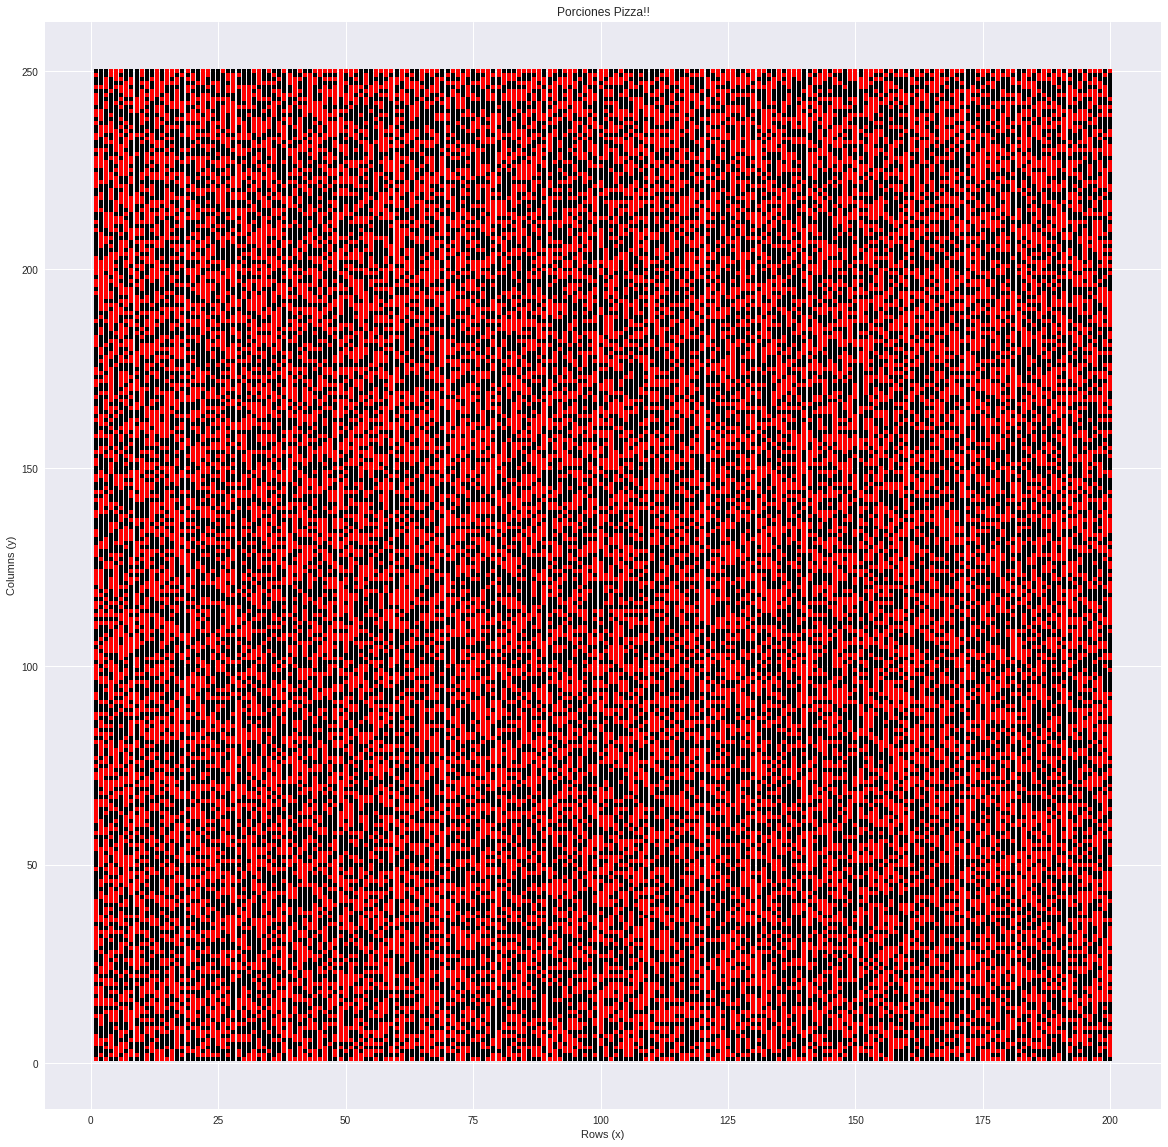

In [14]:
#pyplot.ion()
fig, ax = pyplot.subplots(figsize=(20,20))
x = 0
for row in grid:
  x = x+1
  y = 0
  for cell in row:
    y = y+1
    if cell =='T':
      #print('T', end='')
      ax.plot(x,y, 'rs', alpha=1, ms=4)
    elif cell == 'M':
      #print('M',end='')
      ax.plot(x,y, 'ks', alpha=1, ms=4)
    else:
      print('.',end='')
ax.set(xlabel='Rows (x)', ylabel='Columns (y)',
       title='Porciones Pizza!!')
#pyplot.ioff()

fig.show()

# We need to draw the canvas before we start animating...
fig.canvas.draw()

# Let's capture the background of the figure
backgrounds = [fig.canvas.copy_from_bbox(ax.bbox) for ax in axes]

In [0]:
results = []
# For each row, reset the counters
for r in range(row_count):
  beg = 0
  end = 0
  champi_count = 0
  tmt_count = 0

# While we're not at the end of the row, I count if cell have T or M
while end < col_count:
  if grid[r][end] == 'M':
    champi_count += 1
  elif grid[r][end] == 'T':
    tmt_count +=1
  end +=1

  # If the slice is too big, I must remove one ingredient.
if end-beg > max_area:
  if grid[r][beg] == 'M':
    champi_count -= 1
  elif grid[r][beg] == 'T':
    tmt_count -= 1
  beg +=1
  
  # if we have a valid slice, log it in results and reset the variables, in order to continue searching for new valid slices on the same line
  if (end-beg <= max_area) and champi_count >= min_ingredient):
  results.append( r, beg, r, end - 1))
  beg = end
  tmt_count = 0
  champi_count = 0